CNN 2.0

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
import tensorflow as tf
#importeer Tensorflow namespaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
#K.set_image_dim_ordering('tf')

###### Voor Tensorflow-GPU ########

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import itertools
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from PIL import Image, ImageOps


In [5]:

############Adjustments##############

#options
PATH_DI06C001 = '/media/sf_SF/Stage2021/targetedQE/' 

## Adjustments
path = PATH_DI06C001

filename_Y_labels = 'total_y_matrix_with_binary_label.txt'

########################



# load libraries
import pandas as pd
import os
import random
from PIL import Image
import numpy as np


#set paths
path_data_in = path + 'data/input/' + 'MachineLearning/'
path_data_out = path + 'data/output/' + 'MachineLearning/'
path_data_X = path_data_in + 'Xarrays/' #png's
path_data_y = path_data_in + 'Yarrays/' #labels



## Y
#load all Y labels together
filename = path_data_y + filename_Y_labels
# print(filename)

y = pd.read_csv(filename, sep='\t')



## X
#list all X files and devide in train OR test folder
filenames_X_train = []
filenames_X_test = []
directory_list = os.listdir(path_data_X)
# print(directory_list)

#random order list with filenames
random.shuffle(directory_list)

os.chdir(path_data_X)

i = 0
for filename in directory_list:
    #print (filename) #all files, folders
    #print (i)
    if ".png" in filename :
        #print (filename)
        if i % 3 == 0: 
            #1/3th of data is test set, rest in train
            #print(i)
            filenames_X_test.append(path_data_X + filename)
        else:
            filenames_X_train.append(path_data_X + filename)
        i = i + 1
        
 #check ok? 70-30 devide train - test? ok     
print(len(filenames_X_train))
print(len(filenames_X_test))


## load X data + Merge per train/test X's with Y to S1
#keep only non unique values


def load_X_if_matched_in_y(filenames_list, y):
    all_images_as_array=[]
    label=[]    
    # match = 0
    # no_match = 0
    for filename in filenames_list:
        #print(filename)
        #filename = filenames_X_train[3]
        filename_wopath = filename.split('Xarrays/')[1]
        #filename_wopath = filename_wopath[:-4] #wo .png todo, see same x/y !!!
        #filename_wobw = filename_wopath.split('_bw')[0]+".png"
        #print(filename_wopath)
    
        matching_y = y[y.png==filename_wopath]
        #print(matching_y)
        if len(matching_y) == 1:
            label.append(matching_y.iloc[0,2]) #1st elem contains string NF/FOUND
            
            #load figure correctly as array [[], [], []]]
            img=Image.open(filename)
            np_array = np.asarray(img)
            #print(np_array.shape)
            
            l,b,c = np_array.shape    
            np_array = np_array.reshape(l*b*c,)   
            all_images_as_array.append(np_array)
            # match = match + 1
            
        if len(matching_y) != 1:
            # print("no or multiple match(es) in y found for: " + filename)
            # no_match = no_match + 1
            continue

    return np.array(all_images_as_array), np.array(label)
    

#if re.match(filename_wopath, y.Name[0]): #todo search in volled colom, ev niet via regress want wo .png moet volled zelfde
        


X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)


print(X_train)
print(len(y_train))
print(X_test)
print(len(y_test))



3406
1704
      Column1 SampleTargetedcombination  Classification  \
2042     2042     200805s072_Kynurenine               1   

                                         png  
2042  df_200805s072.txt_ID320_Kynurenine.png  
      Column1     SampleTargetedcombination  Classification  \
1222     1222             200805s053_Indole               1   
1248     1248  200805s053_Indoleacrylicacid               1   

                                                 png  
1222  df_200805s053.txt_ID1405_Indoleacrylicacid.png  
1248  df_200805s053.txt_ID1405_Indoleacrylicacid.png  
      Column1  SampleTargetedcombination  Classification  \
4705     4705  200805s081_2Butoxyethanol               0   
4706     4706  200805s081_2Butoxyethanol               0   
4707     4707  200805s081_2Butoxyethanol               0   
4708     4708  200805s081_2Butoxyethanol               0   

                                             png  
4705  df_200805s081.txt_ID002_2Butoxyethanol.png  
4706  df_200805s081

      Column1 SampleTargetedcombination  Classification  \
3591     3591     200805s047_Spermidine               1   

                                         png  
3591  df_200805s047.txt_ID219_Spermidine.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
5010     5010  200929s045_Dopamined4HCL               1   

                                             png  
5010  df_200929s045.txt_ID1578_Dopamined4HCL.png  
      Column1 SampleTargetedcombination  Classification  \
2806     2806   200805s016_DLMaleicacid               0   

                                           png  
2806  df_200805s016.txt_ID084_DLMaleicacid.png  
      Column1       SampleTargetedcombination  Classification  \
2663     2663  200805s093_3indoleaceticacidd5               1   

                                                   png  
2663  df_200805s093.txt_ID1577_3indoleaceticacidd5.png  
      Colum

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1               SampleTargetedcombination  Classification  \
3023     3023  200805s029_SodiumtaurolithocholateTLCA               0   

                                                    png  
3023  df_200805s029.txt_ID285_Sodiumtaurolithocholat...  
      Column1           SampleTargetedcombination  Classification  \
3336     3336  200805s039_UrsodeoxycholicacidUDCA               1   

                                                    png  
3336  df_200805s039.txt_ID279_UrsodeoxycholicacidUDC...  
      Column1 SampleTargetedcombination  Classification  \
2530     2530    200805s081_Valericacid               1   
2531     2531    200805s081_Valericacid               1   
2532     2532    200805s081_Valericacid               1   
2533     2533    200805s081_Valericacid               1   

                                          png  
2530  df_200805s081.txt_ID049_Valericacid.png

     Column1  SampleTargetedcombination  Classification  \
463      463  200805s035_Dodecanoicacid               0   

                                            png  
463  df_200805s035.txt_ID063_Dodecanoicacid.png  
     Column1 SampleTargetedcombination  Classification  \
824      824     200805s043_Kynurenine               1   

                                        png  
824  df_200805s043.txt_ID320_Kynurenine.png  
      Column1                      SampleTargetedcombination  Classification  \
3577     3577  200805s047_SodiumtaurodeoxycholatehydrateTDCA               0   

                                                    png  
3577  df_200805s047.txt_ID283_Sodiumtaurodeoxycholat...  
      Column1      SampleTargetedcombination  Classification  \
4789     4789  200805s092_LithocholicacidLCA               1   

                                                 png  
4789  df_200805s092.txt_ID277_LithocholicacidLCA.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombina

      Column1 SampleTargetedcombination  Classification  \
2968     2968       200805s021_Dopamine               0   

                                             png  
2968  df_200805s021.txt_ID1578_Dopamined4HCL.png  
      Column1 SampleTargetedcombination  Classification  \
1303     1303   200805s055_Hexanoicacid               1   

                                           png  
1303  df_200805s055.txt_ID051_Hexanoicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1           SampleTargetedcombination  Classification  \
1055     1055                   200805s049_Indole               1   
1062     1062  200805s049_Indoleethanoltryptophol               1   

                                                    png  
1055  df_200805s049.txt_ID1407_Indoleethanoltryptoph...  
1062  df_200805s049.txt_ID1407_Indoleethanoltryptoph...  
      Column1           SampleTargetedcombination  Classification  \
4409     4409  200

      Column1      SampleTargetedcombination  Classification  \
3312     3312  200805s038_DeoxycholicacidDCA               1   

                                                 png  
3312  df_200805s038.txt_ID289_DeoxycholicacidDCA.png  
     Column1  SampleTargetedcombination  Classification  \
748      748  200805s041_Isovalericacid               1   

                                            png  
748  df_200805s041.txt_ID056_Isovalericacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1    SampleTargetedcombination  Classification  \
3639     3639  200805s049_3Phenyl1propanol               0   

                                               png  
3639  df_200805s049.txt_ID004_3Phenyl1propanol.png  
      Column1         SampleTargetedcombination  Classification  \
3729     3729  200805s051_SodiumglycocholateGCA           

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1       SampleTargetedcombination  Classification  \
2161     2161  200805s075_S2Methylbutyricacid               1   

                                                  png  
2161  df_200805s075.txt_ID066_S2Methylbutyricacid.png  
      Column1 SampleTargetedcombination  Classification  \
3697     3697    200805s050_Pyruvicacid               1   

                                          png  
3697  df_200805s050.txt_ID082_Pyruvicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
3877     3877     200805s056_Putrescine               1   

                                         png  
3877  df_200805s056.txt_ID220_Putrescine.png  
      Column1                          SampleTargetedcombination  \
2576     2576                                  200805s091_Indole   
2587   

      Column1 SampleTargetedcombination  Classification  \
2084     2084   200805s073_Hexanoicacid               0   

                                           png  
2084  df_200805s073.txt_ID051_Hexanoicacid.png  
      Column1                     SampleTargetedcombination  Classification  \
4083     4083  200805s063_SodiumglycochenodeoxycholateGCDCA               1   

                                                    png  
4083  df_200805s063.txt_ID282_Sodiumglycochenodeoxyc...  
     Column1  SampleTargetedcombination  Classification  \
211      211  200805s029_Dodecanoicacid               0   

                                            png  
211  df_200805s029.txt_ID063_Dodecanoicacid.png  
     Column1 SampleTargetedcombination  Classification  \
333      333     200805s031_Tryptophan               1   

                                        png  
333  df_200805s031.txt_ID293_Tryptophan.png  
     Column1 SampleTargetedcombination  Classification  \
645      645     20080

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                     SampleTargetedcombination  Classification  \
3416     3416  200805s041_SodiumglycochenodeoxycholateGCDCA               1   

                                                    png  
3416  df_200805s041.txt_ID282_Sodiumglycochenodeoxyc...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                   SampleTargetedcombination  Classification  \
4433     4433  200805s074_DPantothenicacidhemicalciumsalt               1   

                                                    png  
4433  df_200805s074.txt_ID185_DPantothenicacidhemica...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1     SampleTargetedcombination  Classification  \
1605     1605  2008

      Column1 SampleTargetedcombination  Classification  \
4991     4991  200929s039_Dopamined4HCL               1   

                                             png  
4991  df_200929s039.txt_ID1578_Dopamined4HCL.png  
      Column1 SampleTargetedcombination  Classification  \
4278     4278    200805s069_Fumaricacid               1   

                                          png  
4278  df_200805s069.txt_ID417_Fumaricacid.png  
      Column1 SampleTargetedcombination  Classification  \
1217     1217     200805s052_Tryptophan               1   

                                         png  
1217  df_200805s052.txt_ID293_Tryptophan.png  
      Column1 SampleTargetedcombination  Classification  \
3245     3245    200805s036_Fumaricacid               1   

                                          png  
3245  df_200805s036.txt_ID417_Fumaricacid.png  
      Column1           SampleTargetedcombination  Classification  \
2575     2575                   200805s091_Indole               0  

     Column1    SampleTargetedcombination  Classification  \
461      461  200805s034_Phenylaceticacid               1   

                                              png  
461  df_200805s034.txt_ID047_Phenylaceticacid.png  
     Column1       SampleTargetedcombination  Classification  \
661      661  200805s039_3Hydroxybutyricacid               0   

                                                 png  
661  df_200805s039.txt_ID072_3Hydroxybutyricacid.png  
      Column1         SampleTargetedcombination  Classification  \
3758     3758  200805s052_SodiumglycocholateGCA               1   

                                                    png  
3758  df_200805s052.txt_ID281_SodiumglycocholateGCA.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                      SampleTargetedcombination  Classification  \
4745     4745  200805s081_SodiumtaurodeoxycholatehydrateTDCA               0   
4746     4746  200805s081_Sodi

      Column1 SampleTargetedcombination  Classification  \
4775     4775      200805s091_Malicacid               0   

                                        png  
4775  df_200805s091.txt_ID076_Malicacid.png  
      Column1                    SampleTargetedcombination  Classification  \
1256     1256  200805s053_Isocaproicacid4Methylvalericacid               0   

                                                    png  
1256  df_200805s053.txt_ID050_Isocaproicacid4Methylv...  
      Column1     SampleTargetedcombination  Classification  \
1331     1331             200805s055_Indole               1   
1343     1343  200805s055_Indoleacrylicacid               1   

                                                 png  
1331  df_200805s055.txt_ID1405_Indoleacrylicacid.png  
1343  df_200805s055.txt_ID1405_Indoleacrylicacid.png  
      Column1                 SampleTargetedcombination  Classification  \
3779     3779  200805s053_GlycoursodeoxycholicacidGUDCA               1   

          

    Column1     SampleTargetedcombination  Classification  \
10       10             200805s018_Indole               1   
28       28        200805s018_Lactic_acid               1   
39       39  200805s018_Indole3Lacticacid               1   

                                               png  
10  df_200805s018.txt_ID1397_Indole3Lacticacid.png  
28  df_200805s018.txt_ID1397_Indole3Lacticacid.png  
39  df_200805s018.txt_ID1397_Indole3Lacticacid.png  
      Column1 SampleTargetedcombination  Classification  \
4985     4985  200929s037_Dopamined4HCL               1   

                                             png  
4985  df_200929s037.txt_ID1578_Dopamined4HCL.png  
      Column1 SampleTargetedcombination  Classification  \
2003     2003   200805s071_Hexanoicacid               0   

                                           png  
2003  df_200805s071.txt_ID051_Hexanoicacid.png  
      Column1               SampleTargetedcombination  Classification  \
3214     3214  200805s035_Sodium

      Column1 SampleTargetedcombination  Classification  \
2853     2853     200805s017_Putrescine               0   

                                         png  
2853  df_200805s017.txt_ID220_Putrescine.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
4018     4018       200805s061_Dopamine               1   

                                       png  
4018  df_200805s061.txt_ID218_Dopamine.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
3100     3100   200805s031_DLMaleicacid               0   

                                           png  
3100  df_200805s031.txt_ID084_DLMaleicacid.png  
      Column1               SampleTargetedcombination  Classification  \
4783     4783  200805s091_SodiumtaurolithocholateTLCA               0   

                            

      Column1         SampleTargetedcombination  Classification  \
3060     3060  200805s030_SodiumglycocholateGCA               0   

                                                    png  
3060  df_200805s030.txt_ID281_SodiumglycocholateGCA.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
3382     3382      200805s040_DValined8               1   

                                        png  
3382  df_200805s040.txt_ID182_DValined8.png  
      Column1           SampleTargetedcombination  Classification  \
1622     1622  200805s062_Indoleethanoltryptophol               1   
1634     1634                   200805s062_Indole               1   

                                                    png  
1622  df_200805s062.txt_ID1407_Indoleethanoltryptoph...  
1634  df_200805s062.txt_ID1407_Indoleethanoltryptoph...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, C

      Column1                      SampleTargetedcombination  Classification  \
4839     4839  200805s093_SodiumtaurodeoxycholatehydrateTDCA               0   

                                                    png  
4839  df_200805s093.txt_ID283_Sodiumtaurodeoxycholat...  
      Column1               SampleTargetedcombination  Classification  \
3396     3396  200805s041_Serotonin5hydroxytryptamine               1   

                                                    png  
3396  df_200805s041.txt_ID296_Serotonin5hydroxytrypt...  
     Column1                    SampleTargetedcombination  Classification  \
373      373  200805s032_Isocaproicacid4Methylvalericacid               1   

                                                   png  
373  df_200805s032.txt_ID050_Isocaproicacid4Methylv...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1               SampleTargetedcombination  Classification  \
2787     2787  200805s015

      Column1  SampleTargetedcombination  Classification  \
3593     3593  200805s047_2Butoxyethanol               0   

                                             png  
3593  df_200805s047.txt_ID002_2Butoxyethanol.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1        SampleTargetedcombination  Classification  \
1933     1933                200805s070_Indole               1   
1966     1966  200805s070_Indole3Propionicacid               1   

                                                    png  
1933  df_200805s070.txt_ID1391_Indole3Propionicacid.png  
1966  df_200805s070.txt_ID1391_Indole3Propionicacid.png  
     Column1        SampleTargetedcombination  Classification  \
306      306  200805s031_Skatole3methylindole               1   

                                                  png  
306  df_200805s031.txt_ID735_Sk

      Column1  SampleTargetedcombination  Classification  \
1176     1176  200805s052_Dodecanoicacid               1   

                                             png  
1176  df_200805s052.txt_ID063_Dodecanoicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
2812     2812      200805s016_Malicacid               0   

                                        png  
2812  df_200805s016.txt_ID076_Malicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
     Column1       SampleTargetedcombination  Classification  \
384      384  200805s033_3indoleaceticacidd5               1   

                                                  png  
384  df_200805s033.txt_ID1577_3indoleaceticacidd5.png  
      Column1           SampleTargetedcombination  Classification  \
4343     4343  200805s071_UrsodeoxycholicacidUDCA               1   



      Column1  SampleTargetedcombination  Classification  \
2075     2075  200805s073_Isovalericacid               1   

                                             png  
2075  df_200805s073.txt_ID056_Isovalericacid.png  
      Column1               SampleTargetedcombination  Classification  \
4161     4161  200805s065_SodiumglycodeoxycholateGDCA               1   

                                                    png  
4161  df_200805s065.txt_ID284_Sodiumglycodeoxycholat...  
      Column1             SampleTargetedcombination  Classification  \
3172     3172  200805s034_gammaaminobutyricacidGABA               1   

                                                    png  
3172  df_200805s034.txt_ID183_gammaaminobutyricacidG...  
     Column1 SampleTargetedcombination  Classification  \
679      679   200805s040_Succinicacid               1   

                                          png  
679  df_200805s040.txt_ID085_Succinicacid.png  
Empty DataFrame
Columns: [Column1, SampleT

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
3531     3531    200805s045_Malonicacid               0   

                                          png  
3531  df_200805s045.txt_ID095_Malonicacid.png  
     Column1        SampleTargetedcombination  Classification  \
176      176  200805s028_3HydroxyDLkynurenine               0   

                                                   png  
176  df_200805s028.txt_ID1394_3HydroxyDLkynurenine.png  
      Column1        SampleTargetedcombination  Classification  \
1209     1209  200805s052_3Phenylpropionicacid               1   

                                                   png  
1209  df_200805s052.txt_ID048_3Phenylpropionicacid.png  
     Column1     SampleTargetedcombination  Classification  \
130      130  200805s021_3Indoleaceticacid               1   
143      143             200805s021_Indole               1   

             

     Column1 SampleTargetedcombination  Classification  \
671      671   200805s039_Succinicacid               1   

                                          png  
671  df_200805s039.txt_ID085_Succinicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                 SampleTargetedcombination  Classification  \
4478     4478  200805s076_TauroursodeoxycholicacidTUDCA               0   

                                                    png  
4478  df_200805s076.txt_ID278_Tauroursodeoxycholicac...  
    Column1 SampleTargetedcombination  Classification  \
53       53         200805s019_Indole               1   

                                   png  
53  df_200805s019.txt_ID226_Indole.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
4313     4313      200805s070_DValined8               1   

                  

      Column1 SampleTargetedcombination  Classification  \
3587     3587    200805s047_Malonicacid               0   

                                          png  
3587  df_200805s047.txt_ID095_Malonicacid.png  
      Column1 SampleTargetedcombination  Classification  \
3953     3953   200805s059_CholicacidCA               0   

                                           png  
3953  df_200805s059.txt_ID275_CholicacidCA.png  
      Column1  SampleTargetedcombination  Classification  \
2846     2846  200805s017_2Butoxyethanol               0   

                                             png  
2846  df_200805s017.txt_ID002_2Butoxyethanol.png  
     Column1     SampleTargetedcombination  Classification  \
527      527             200805s036_Indole               1   
542      542  200805s036_Indoleacrylicacid               1   

                                                png  
527  df_200805s036.txt_ID1405_Indoleacrylicacid.png  
542  df_200805s036.txt_ID1405_Indoleacrylicacid.pn

      Column1                    SampleTargetedcombination  Classification  \
2276     2276  200805s078_Isocaproicacid4Methylvalericacid               1   

                                                    png  
2276  df_200805s078.txt_ID050_Isocaproicacid4Methylv...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                 SampleTargetedcombination  Classification  \
3599     3599  200805s047_TauroursodeoxycholicacidTUDCA               0   

                                                    png  
3599  df_200805s047.txt_ID278_Tauroursodeoxycholicac...  
      Column1 SampleTargetedcombination  Classification  \
4760     4760    200805s091_Fumaricacid               1   

                                          png  
4760  df_200805s091.txt_ID417_Fumaricacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombinatio

      Column1        SampleTargetedcombination  Classification  \
2019     2019  200805s072_3Phenylpropionicacid               1   

                                                   png  
2019  df_200805s072.txt_ID048_3Phenylpropionicacid.png  
     Column1        SampleTargetedcombination  Classification  \
533      533  200805s036_3HydroxyDLkynurenine               0   

                                                   png  
533  df_200805s036.txt_ID1394_3HydroxyDLkynurenine.png  
      Column1       SampleTargetedcombination  Classification  \
1592     1592  200805s061_S2Methylbutyricacid               1   

                                                  png  
1592  df_200805s061.txt_ID066_S2Methylbutyricacid.png  
      Column1 SampleTargetedcombination  Classification  \
1751     1751     200805s065_Tryptophan               1   

                                         png  
1751  df_200805s065.txt_ID293_Tryptophan.png  
      Column1             SampleTargetedcombination 

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
4162     4162    200805s065_Pyruvicacid               1   

                                          png  
4162  df_200805s065.txt_ID082_Pyruvicacid.png  
    Column1           SampleTargetedcombination  Classification  \
12       12                   200805s018_Indole               1   
40       40  200805s018_Indoleethanoltryptophol               1   

                                                  png  
12  df_200805s018.txt_ID1407_Indoleethanoltryptoph...  
40  df_200805s018.txt_ID1407_Indoleethanoltryptoph...  
      Column1 SampleTargetedcombination  Classification  \
4233     4233   200805s068_CholicacidCA               1   

                                           png  
4233  df_200805s068.txt_ID275_CholicacidCA.png  
      Column1                      SampleTargetedcombination  Classification  \
4039     4039  200805s061

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
     Column1       SampleTargetedcombination  Classification  \
222      222  200805s029_S2Methylbutyricacid               1   

                                                 png  
222  df_200805s029.txt_ID066_S2Methylbutyricacid.png  
      Column1     SampleTargetedcombination  Classification  \
1523     1523  200805s060_Indoleacrylicacid               0   
1532     1532             200805s060_Indole               1   

                                                 png  
1523  df_200805s060.txt_ID1405_Indoleacrylicacid.png  
1532  df_200805s060.txt_ID1405_Indoleacrylicacid.png  
      Column1 SampleTargetedcombination  Classification  \
1133     1133     200805s050_Tryptophan               1   

                                         png  
1133  df_200805s050.txt_ID293_Tryptophan.png  
      Column1       SampleTargetedcombination  Classification  \
2518     2518  200805s081_3indoleac

     Column1 SampleTargetedcombination  Classification  \
959      959     200805s046_Tyrosined2               1   
960      960     200805s046_Tyrosined2               1   
961      961     200805s046_Tyrosined2               1   
962      962     200805s046_Tyrosined2               1   

                                         png  
959  df_200805s046.txt_ID1576_Tyrosined2.png  
960  df_200805s046.txt_ID1576_Tyrosined2.png  
961  df_200805s046.txt_ID1576_Tyrosined2.png  
962  df_200805s046.txt_ID1576_Tyrosined2.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
     Column1 SampleTargetedcombination  Classification  \
884      884   200805s045_Succinicacid               1   

                                          png  
884  df_200805s045.txt_ID085_S

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1     SampleTargetedcombination  Classification  \
1582     1582  200805s061_3Indoleaceticacid               1   
1590     1590             200805s061_Indole               1   

                                                png  
1582  df_200805s061.txt_ID201_3Indoleaceticacid.png  
1590  df_200805s061.txt_ID201_3Indoleaceticacid.png  
      Column1                     SampleTargetedcombination  Classification  \
3614     3614  200805s048_SodiumglycochenodeoxycholateGCDCA               0   

                                                    png  
3614  df_200805s048.txt_ID282_Sodiumglycochenodeoxyc...  
      Column1                          SampleTargetedcombination  \
4269     4269  200805s069_Taurochenodeoxycholicacidsodiumsalt...   

      Classification                                                png  
4269               0  df_200805s069.txt_ID286_Taurochenodeoxycholica.

      Column1                 SampleTargetedcombination  Classification  \
4213     4213  200805s067_TauroursodeoxycholicacidTUDCA               0   

                                                    png  
4213  df_200805s067.txt_ID278_Tauroursodeoxycholicac...  
     Column1     SampleTargetedcombination  Classification  \
278      278  200805s030_3Indoleaceticacid               1   
286      286             200805s030_Indole               1   

                                               png  
278  df_200805s030.txt_ID201_3Indoleaceticacid.png  
286  df_200805s030.txt_ID201_3Indoleaceticacid.png  
      Column1     SampleTargetedcombination  Classification  \
1054     1054             200805s049_Indole               1   
1083     1083  200805s049_Indoleacrylicacid               1   

                                                 png  
1054  df_200805s049.txt_ID1405_Indoleacrylicacid.png  
1083  df_200805s049.txt_ID1405_Indoleacrylicacid.png  
Empty DataFrame
Columns: [Column

      Column1           SampleTargetedcombination  Classification  \
3090     3090  200805s031_UrsodeoxycholicacidUDCA               1   

                                                    png  
3090  df_200805s031.txt_ID279_UrsodeoxycholicacidUDC...  
      Column1 SampleTargetedcombination  Classification  \
3248     3248       200805s036_Dopamine               0   

                                       png  
3248  df_200805s036.txt_ID218_Dopamine.png  
     Column1        SampleTargetedcombination  Classification  \
138      138                200805s021_Indole               1   
164      164  200805s021_Indole3Propionicacid               1   

                                                   png  
138  df_200805s021.txt_ID1391_Indole3Propionicacid.png  
164  df_200805s021.txt_ID1391_Indole3Propionicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
1758     1758    

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1           SampleTargetedcombination  Classification  \
4628     4628  200805s080_UrsodeoxycholicacidUDCA               1   

                                                    png  
4628  df_200805s080.txt_ID279_UrsodeoxycholicacidUDC...  
      Column1 SampleTargetedcombination  Classification  \
3091     3091      200805s031_DValined8               1   

                                        png  
3091  df_200805s031.txt_ID182_DValined8.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1      SampleTargetedcombination  Classification  \
4349     4349  200805s071_LithocholicacidLCA               1   

                                                 png  
4349  df_200805s071.txt_ID277_LithocholicacidLCA.png  
      Column1               SampleTargetedcombination  Classification  \
4496     4496  200805s076_Sodiumtaur

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1             SampleTargetedcombination  Classification  \
4164     4164  200805s066_gammaaminobutyricacidGABA               1   

                                                    png  
4164  df_200805s066.txt_ID183_gammaaminobutyricacidG...  
      Column1 SampleTargetedcombination  Classification  \
4577     4577     200805s079_Putrescine               1   

                                         png  
4577  df_200805s079.txt_ID220_Putrescine.png  
      Column1  SampleTargetedcombination  Classification  \
2316     2316  200805s079_Isovalericacid               1   

                                             png  
2316  df_200805s079.txt_ID056_Isovalericacid.png  
      Column1 SampleTargetedcombination  Classification  \
1663     1663   200805s063_Succinicacid               1   

                                           png  
1663  df_200805s063.txt_ID085_Succinicacid.p

      Column1  SampleTargetedcombination  Classification  \
2100     2100  200805s074_Dodecanoicacid               0   

                                             png  
2100  df_200805s074.txt_ID063_Dodecanoicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1       SampleTargetedcombination  Classification  \
1272     1272  200805s054_3indoleaceticacidd5               1   

                                                   png  
1272  df_200805s054.txt_ID1577_3indoleaceticacidd5.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1   SampleTargetedcombination  Classification  \
4886     4886  200929s004_Lalanined3333D3               1   

                                              png  
4886  df_200929s004.txt_ID331_Lalanined3333D3.png  
      Column1                 SampleTargetedcombination  Classification  \
4260     4260  200805s069_Glycoursodeoxychol

      Column1               SampleTargetedcombination  Classification  \
3931     3931  200805s058_SodiumtaurolithocholateTLCA               0   

                                                    png  
3931  df_200805s058.txt_ID285_Sodiumtaurolithocholat...  
      Column1         SampleTargetedcombination  Classification  \
4201     4201  200805s067_SodiumglycocholateGCA               0   

                                                    png  
4201  df_200805s067.txt_ID281_SodiumglycocholateGCA.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
3910     3910       200805s057_Dopamine               0   

                                       png  
3910  df_200805s057.txt_ID218_Dopamine.png  
      Column1         SampleTargetedcombination  Classification  \
4057     4057  200805s062_SodiumglycocholateGCA               0   

                                                 

     Column1           SampleTargetedcombination  Classification  \
576      576  200805s037_3hydroxyanthranilicacid               1   

                                                   png  
576  df_200805s037.txt_ID1395_3hydroxyanthranilicac...  
     Column1       SampleTargetedcombination  Classification  \
816      816  200805s043_3Hydroxybutyricacid               1   

                                                 png  
816  df_200805s043.txt_ID072_3Hydroxybutyricacid.png  
     Column1        SampleTargetedcombination  Classification  \
473      473  200805s035_2hydroxyhexanoicacid               0   

                                                  png  
473  df_200805s035.txt_ID074_2hydroxyhexanoicacid.png  
      Column1                     SampleTargetedcombination  Classification  \
4803     4803  200805s092_SodiumglycochenodeoxycholateGCDCA               1   

                                                    png  
4803  df_200805s092.txt_ID282_Sodiumglycochenodeox

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
     Column1     SampleTargetedcombination  Classification  \
814      814  200805s043_3Indoleaceticacid               1   
838      838             200805s043_Indole               1   

                                               png  
814  df_200805s043.txt_ID201_3Indoleaceticacid.png  
838  df_200805s043.txt_ID201_3Indoleaceticacid.png  
      Column1                      SampleTargetedcombination  Classification  \
3441     3441  200805s042_SodiumtaurodeoxycholatehydrateTDCA               1   

                                                    png  
3441  df_200805s042.txt_ID283_Sodiumtaurodeoxycholat...  
      Column1 SampleTargetedcombination  Classification  \
4062     4062      200805s062_DValined8               1   

                                        png  
4062  df_200805s062.txt_ID182_DValined8.png  
      Column1 SampleTargetedcombination  Classification  \
1844     1844 

      Column1 SampleTargetedcombination  Classification  \
4914     4914  200929s013_Dopamined4HCL               1   

                                             png  
4914  df_200929s013.txt_ID1578_Dopamined4HCL.png  
      Column1     SampleTargetedcombination  Classification  \
1053     1053             200805s049_Indole               1   
1071     1071  200805s049_Indole3Lacticacid               1   
1076     1076        200805s049_Lactic_acid               1   

                                                 png  
1053  df_200805s049.txt_ID1397_Indole3Lacticacid.png  
1071  df_200805s049.txt_ID1397_Indole3Lacticacid.png  
1076  df_200805s049.txt_ID1397_Indole3Lacticacid.png  
     Column1 SampleTargetedcombination  Classification  \
946      946     200805s046_Tryptophan               1   

                                        png  
946  df_200805s046.txt_ID293_Tryptophan.png  
      Column1 SampleTargetedcombination  Classification  \
3790     3790    200805s053_Malonicaci

      Column1        SampleTargetedcombination  Classification  \
3988     3988  200805s060_3Methylthio1propanol               0   

                                                   png  
3988  df_200805s060.txt_ID003_3Methylthio1propanol.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1      SampleTargetedcombination  Classification  \
3445     3445  200805s042_DeoxycholicacidDCA               1   

                                                 png  
3445  df_200805s042.txt_ID289_DeoxycholicacidDCA.png  
      Column1           SampleTargetedcombination  Classification  \
3838     3838  200805s055_UrsodeoxycholicacidUDCA               1   

                                                    png  
3838  df_200805s055.txt_ID279_UrsodeoxycholicacidUDC...  
     Column1        SampleTargetedcombination  Classification  \
539      539  200805s036_2hydroxyhexanoicacid               0   

                                   

      Column1      SampleTargetedcombination  Classification  \
3831     3831  200805s055_LithocholicacidLCA               1   

                                                 png  
3831  df_200805s055.txt_ID277_LithocholicacidLCA.png  
      Column1 SampleTargetedcombination  Classification  \
1819     1819    200805s067_Valericacid               1   

                                          png  
1819  df_200805s067.txt_ID049_Valericacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1        SampleTargetedcombination  Classification  \
1175     1175  200805s051_3Phenylpropionicacid               1   

                                                   png  
1175  df_200805s051.txt_ID048_3Phenylpropionicacid.png  
     Column1  SampleTargetedcombination  Classification  \
379      379  200805s033_Dodecanoicacid               0   

                                            png  
379  df_200805s033.txt_ID063_Dodecano

      Column1 SampleTargetedcombination  Classification  \
4447     4447       200805s075_Dopamine               0   

                                             png  
4447  df_200805s075.txt_ID1578_Dopamined4HCL.png  
      Column1                 SampleTargetedcombination  Classification  \
3353     3353  200805s039_TauroursodeoxycholicacidTUDCA               0   

                                                    png  
3353  df_200805s039.txt_ID278_Tauroursodeoxycholicac...  
      Column1      SampleTargetedcombination  Classification  \
3481     3481  200805s043_DeoxycholicacidDCA               1   

                                                 png  
3481  df_200805s043.txt_ID289_DeoxycholicacidDCA.png  
      Column1               SampleTargetedcombination  Classification  \
3462     3462  200805s043_SodiumtaurolithocholateTLCA               0   

                                                    png  
3462  df_200805s043.txt_ID285_Sodiumtaurolithocholat...  
     Colum

      Column1        SampleTargetedcombination  Classification  \
1988     1988  200805s071_3HydroxyDLkynurenine               0   

                                                    png  
1988  df_200805s071.txt_ID1394_3HydroxyDLkynurenine.png  
      Column1 SampleTargetedcombination  Classification  \
3695     3695    200805s050_Malonicacid               0   

                                          png  
3695  df_200805s050.txt_ID095_Malonicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
1872     1872     200805s068_Kynurenine               1   

                                         png  
1872  df_200805s068.txt_ID320_Kynurenine.png  
      Column1             SampleTargetedcombination  Classification  \
3664     3664  200805s049_gammaaminobutyricacidGABA               1   

                                                    png  
3664  df_200805s049.txt_ID183

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                   SampleTargetedcombination  Classification  \
3201     3201  200805s034_DPantothenicacidhemicalciumsalt               1   

                                                    png  
3201  df_200805s034.txt_ID185_DPantothenicacidhemica...  
      Column1 SampleTargetedcombination  Classification  \
1874     1874   200805s068_Succinicacid               1   

                                           png  
1874  df_200805s068.txt_ID085_Succinicacid.png  
      Column1 SampleTargetedcombination  Classification  \
3717     3717   200805s051_DLMaleicacid               0   

                                           png  
3717  df_200805s051.txt_ID084_DLMaleicacid.png  
      Column1               SampleTargetedcombination  Classification  \
3538     3538  200805s045_SodiumglycodeoxycholateGDCA               1   

                                                    png

      Column1                      SampleTargetedcombination  Classification  \
3055     3055  200805s030_SodiumtaurodeoxycholatehydrateTDCA               0   

                                                    png  
3055  df_200805s030.txt_ID283_Sodiumtaurodeoxycholat...  
     Column1     SampleTargetedcombination  Classification  \
491      491  200805s035_Indoleacrylicacid               0   
494      494             200805s035_Indole               1   

                                                png  
491  df_200805s035.txt_ID1405_Indoleacrylicacid.png  
494  df_200805s035.txt_ID1405_Indoleacrylicacid.png  
      Column1 SampleTargetedcombination  Classification  \
3757     3757    200805s052_Pyruvicacid               1   

                                          png  
3757  df_200805s052.txt_ID082_Pyruvicacid.png  
      Column1         SampleTargetedcombination  Classification  \
4011     4011  200805s061_SodiumglycocholateGCA               1   

                        

      Column1      SampleTargetedcombination  Classification  \
3080     3080  200805s031_LithocholicacidLCA               1   

                                                 png  
3080  df_200805s031.txt_ID277_LithocholicacidLCA.png  
      Column1     SampleTargetedcombination  Classification  \
1183     1183  200805s052_Indoleacrylicacid               1   
1193     1193             200805s052_Indole               1   

                                                 png  
1183  df_200805s052.txt_ID1405_Indoleacrylicacid.png  
1193  df_200805s052.txt_ID1405_Indoleacrylicacid.png  
      Column1 SampleTargetedcombination  Classification  \
4369     4369    200805s072_Malonicacid               0   

                                          png  
4369  df_200805s072.txt_ID095_Malonicacid.png  
      Column1           SampleTargetedcombination  Classification  \
2510     2510  200805s081_3hydroxyanthranilicacid               1   
2511     2511  200805s081_3hydroxyanthranilicacid    

      Column1 SampleTargetedcombination  Classification  \
1490     1490         200805s059_Indole               1   

                                     png  
1490  df_200805s059.txt_ID226_Indole.png  
      Column1           SampleTargetedcombination  Classification  \
2176     2176                   200805s075_Indole               1   
2182     2182  200805s075_Indoleethanoltryptophol               1   

                                                    png  
2176  df_200805s075.txt_ID1407_Indoleethanoltryptoph...  
2182  df_200805s075.txt_ID1407_Indoleethanoltryptoph...  
      Column1                   SampleTargetedcombination  Classification  \
2938     2938  200805s020_DPantothenicacidhemicalciumsalt               1   

                                                    png  
2938  df_200805s020.txt_ID185_DPantothenicacidhemica...  
      Column1        SampleTargetedcombination  Classification  \
2350     2350  200805s079_3Phenylpropionicacid               1   

         

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                 SampleTargetedcombination  Classification  \
3088     3088  200805s031_TauroursodeoxycholicacidTUDCA               0   

                                                    png  
3088  df_200805s031.txt_ID278_Tauroursodeoxycholicac...  
      Column1    SampleTargetedcombination  Classification  \
1625     1625  200805s062_Phenylaceticacid               1   

                                               png  
1625  df_200805s062.txt_ID047_Phenylaceticacid.png  
      Column1      SampleTargetedcombination  Classification  \
3744     3744  200805s052_LithocholicacidLCA               1   

                                                 png  
3744  df_200805s052.txt_ID277_LithocholicacidLCA.png  
      Column1           SampleTargetedcombination  Classification  \
1014     1014  200805s048_Indoleethanoltryptophol               1   
1040     1040                   

      Column1 SampleTargetedcombination  Classification  \
1781     1781         200805s066_Indole               1   

                                     png  
1781  df_200805s066.txt_ID226_Indole.png  
      Column1 SampleTargetedcombination  Classification  \
1063     1063     200805s049_Tryptophan               1   

                                         png  
1063  df_200805s049.txt_ID293_Tryptophan.png  
     Column1        SampleTargetedcombination  Classification  \
604      604  200805s038_Skatole3methylindole               1   

                                                  png  
604  df_200805s038.txt_ID735_Skatole3methylindole.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
1085     1085     200805s049_Kynurenine               1   

                                         png  
1085  df_200805s049.txt_ID320_Kynurenine.png  
Empty DataFrame
Columns: [Column1

3302  df_200805s038.txt_ID285_Sodiumtaurolithocholat...  
      Column1 SampleTargetedcombination  Classification  \
2287     2287     200805s078_Tyrosined2               1   
2288     2288     200805s078_Tyrosined2               1   
2289     2289     200805s078_Tyrosined2               1   
2290     2290     200805s078_Tyrosined2               1   

                                          png  
2287  df_200805s078.txt_ID1576_Tyrosined2.png  
2288  df_200805s078.txt_ID1576_Tyrosined2.png  
2289  df_200805s078.txt_ID1576_Tyrosined2.png  
2290  df_200805s078.txt_ID1576_Tyrosined2.png  
     Column1 SampleTargetedcombination  Classification  \
735      735     200805s041_Kynurenine               1   

                                        png  
735  df_200805s041.txt_ID320_Kynurenine.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
   Column1 SampleTargetedcombination  Classification  \
3        3     200805s018_Kynurenine            

     Column1 SampleTargetedcombination  Classification  \
710      710   200805s040_Octanoicacid               0   

                                          png  
710  df_200805s040.txt_ID061_Octanoicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1     SampleTargetedcombination  Classification  \
1869     1869  200805s068_3Indoleaceticacid               1   
1883     1883             200805s068_Indole               1   

                                                png  
1869  df_200805s068.txt_ID201_3Indoleaceticacid.png  
1883  df_200805s068.txt_ID201_3Indoleaceticacid.png  
      Column1        SampleTargetedcombination  Classification  \
2239     2239  200805s077_3HydroxyDLkynurenine               0   

                                                    png  
2239  df_200805s077.txt_ID1394_3HydroxyDLkynurenine.png  
      Column1               SampleTargetedcombination  Classification  \
4118     4118  20080

      Column1 SampleTargetedcombination  Classification  \
3906     3906    200805s057_Fumaricacid               1   

                                          png  
3906  df_200805s057.txt_ID417_Fumaricacid.png  
      Column1 SampleTargetedcombination  Classification  \
3938     3938     200805s058_Putrescine               1   

                                         png  
3938  df_200805s058.txt_ID220_Putrescine.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1  SampleTargetedcombination  Classification  \
2698     2698  200805s154_Isovalericacid               1   

                                             png  
2698  df_200805s154.txt_ID056_Isovalericacid.png  
    Column1 SampleTargetedcombination  Classification  \
27       27    200805s018_Lactic_acid               1   

                                        png  
27  df_200805s018.txt_ID073_LLacticacid.png  
      Column1    SampleTargetedcombination  Class

      Column1      SampleTargetedcombination  Classification  \
3049     3049  200805s030_LithocholicacidLCA               1   

                                                 png  
3049  df_200805s030.txt_ID277_LithocholicacidLCA.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1       SampleTargetedcombination  Classification  \
2418     2418  200805s081_3Hydroxybutyricacid               1   
2419     2419  200805s081_3Hydroxybutyricacid               1   
2420     2420  200805s081_3Hydroxybutyricacid               1   
2421     2421  200805s081_3Hydroxybutyricacid               1   

                                                  png  
2418  df_200805s081.txt_ID072_3Hydroxybutyricacid.png  
2419  df_200805s081.txt_ID072_3Hydroxybutyricacid.png  
2420  df_200805s081.txt_ID072_3Hydroxybutyricacid.png  
2421  df_200805s081.txt_ID072_3Hydroxybutyricacid.png  
      Column1 SampleTargetedcombination  Classification  \
432

      Column1 SampleTargetedcombination  Classification  \
3496     3496   200805s044_CholicacidCA               1   

                                           png  
3496  df_200805s044.txt_ID275_CholicacidCA.png  
      Column1             SampleTargetedcombination  Classification  \
4323     4323  200805s071_gammaaminobutyricacidGABA               1   

                                                    png  
4323  df_200805s071.txt_ID183_gammaaminobutyricacidG...  
     Column1 SampleTargetedcombination  Classification  \
274      274    200805s030_Valericacid               1   

                                         png  
274  df_200805s030.txt_ID049_Valericacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
     Column1 SampleTargetedcombination  Classification  \
388      388   200805s033_Octanoicacid               0   

                                          png  
388  df_200805s033.txt_ID061_Octanoicacid.png  
      C

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
3152     3152      200805s033_Malicacid               1   

                                        png  
3152  df_200805s033.txt_ID076_Malicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
1448     1448    200805s058_Lactic_acid               1   

                                          png  
1448  df_200805s058.txt_ID073_LLacticacid.png  
      Column1               SampleTargetedcombination  Classification  \
3351     3351  200805s039_Serotonin5hydroxytryptamine               1   

                                                    png  
3351  df_200805s039.txt_ID296_Serotonin5hydroxytrypt...  
      Column1 SampleTargetedcombination  Classification  \
3812     3812      200805s054_Malicacid               1   

      

      Column1               SampleTargetedcombination  Classification  \
3862     3862  200805s056_SodiumglycodeoxycholateGDCA               1   

                                                    png  
3862  df_200805s056.txt_ID284_Sodiumglycodeoxycholat...  
    Column1 SampleTargetedcombination  Classification  \
34       34     200805s018_Tryptophan               1   

                                       png  
34  df_200805s018.txt_ID293_Tryptophan.png  
     Column1    SampleTargetedcombination  Classification  \
850      850  200805s044_Phenylaceticacid               1   

                                              png  
850  df_200805s044.txt_ID047_Phenylaceticacid.png  
      Column1 SampleTargetedcombination  Classification  \
3735     3735   200805s052_DLMaleicacid               0   

                                           png  
3735  df_200805s052.txt_ID084_DLMaleicacid.png  
      Column1     SampleTargetedcombination  Classification  \
4836     4836  200805s093

      Column1 SampleTargetedcombination  Classification  \
4801     4801      200805s092_Malicacid               1   

                                        png  
4801  df_200805s092.txt_ID076_Malicacid.png  
      Column1     SampleTargetedcombination  Classification  \
1031     1031        200805s048_Lactic_acid               1   
1034     1034  200805s048_Indole3Lacticacid               0   
1038     1038             200805s048_Indole               1   

                                                 png  
1031  df_200805s048.txt_ID1397_Indole3Lacticacid.png  
1034  df_200805s048.txt_ID1397_Indole3Lacticacid.png  
1038  df_200805s048.txt_ID1397_Indole3Lacticacid.png  
      Column1       SampleTargetedcombination  Classification  \
2388     2388  200805s080_S2Methylbutyricacid               1   

                                                  png  
2388  df_200805s080.txt_ID066_S2Methylbutyricacid.png  
      Column1           SampleTargetedcombination  Classification  \
4487

      Column1           SampleTargetedcombination  Classification  \
1350     1350                   200805s056_Indole               1   
1365     1365  200805s056_Indoleethanoltryptophol               1   

                                                    png  
1350  df_200805s056.txt_ID1407_Indoleethanoltryptoph...  
1365  df_200805s056.txt_ID1407_Indoleethanoltryptoph...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
     Column1                    SampleTargetedcombination  Classification  \
745      745  200805s041_Isocaproicacid4Methylvalericacid               1   

                                                   png  
745  df_200805s041.txt_ID050_Isocaproicacid4Methylv...  
      Column1 SampleTargetedcombination  Classification  \
3126     3126    200805s032_Fumaricacid               1   

                                          png  
3126  df_200805s032.txt_ID417_Fumaricacid.png  
      Column1                      Sample

     Column1 SampleTargetedcombination  Classification  \
763      763     200805s042_Kynurenine               1   

                                        png  
763  df_200805s042.txt_ID320_Kynurenine.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                      SampleTargetedcombination  Classification  \
3749     3749  200805s052_SodiumtaurodeoxycholatehydrateTDCA               0   

                                                    png  
3749  df_200805s052.txt_ID283_Sodiumtaurodeoxycholat...  
     Column1     SampleTargetedcombination  Classification  \
547      547  200805s037_Indoleacrylicacid               1   
582      582             200805s037_Indole               1   

                                                png  
547  df_200805s037.txt_ID1405_Indoleacrylicacid.png  
582  df_200805s037.txt_ID1405_Indoleacrylicacid.png  
      Column1 SampleTargetedcombination  Classification  \
3876     3876

      Column1 SampleTargetedcombination  Classification  \
1100     1100     200805s050_Tryptamine               1   

                                         png  
1100  df_200805s050.txt_ID223_Tryptamine.png  
      Column1 SampleTargetedcombination  Classification  \
3015     3015   200805s028_CholicacidCA               0   

                                           png  
3015  df_200805s028.txt_ID275_CholicacidCA.png  
      Column1 SampleTargetedcombination  Classification  \
2050     2050         200805s072_Indole               1   

                                     png  
2050  df_200805s072.txt_ID226_Indole.png  
      Column1       SampleTargetedcombination  Classification  \
1804     1804  200805s066_3Hydroxybutyricacid               1   

                                                  png  
1804  df_200805s066.txt_ID072_3Hydroxybutyricacid.png  
      Column1         SampleTargetedcombination  Classification  \
3272     3272  200805s037_SodiumtaurocholateTCA        

      Column1                 SampleTargetedcombination  Classification  \
4756     4756  200805s091_TauroursodeoxycholicacidTUDCA               0   

                                                    png  
4756  df_200805s091.txt_ID278_Tauroursodeoxycholicac...  
      Column1       SampleTargetedcombination  Classification  \
1960     1960  200805s070_3indoleaceticacidd5               1   

                                                   png  
1960  df_200805s070.txt_ID1577_3indoleaceticacidd5.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
4387     4387      200805s073_DValined8               1   

                                        png  
4387  df_200805s073.txt_ID182_DValined8.png  
      Column1        SampleTargetedcombination  Classification  \
2700     2700  200805s154_Indole3Propionicacid               0   
2723     2723                200805s154_Indole      

      Column1  SampleTargetedcombination  Classification  \
3929     3929  200805s058_2Butoxyethanol               0   

                                             png  
3929  df_200805s058.txt_ID002_2Butoxyethanol.png  
      Column1                 SampleTargetedcombination  Classification  \
3490     3490  200805s044_TauroursodeoxycholicacidTUDCA               0   

                                                    png  
3490  df_200805s044.txt_ID278_Tauroursodeoxycholicac...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
     Column1       SampleTargetedcombination  Classification  \
428      428  200805s034_3Hydroxybutyricacid               1   

                                                 png  
428  df_200805s034.txt_ID072_3Hydroxybutyricacid.png  
     Column1        SampleTargetedcombination  Classification  \
967      967  200805s047_Skatole3methylindole               1   

                                               

     Column1     SampleTargetedcombination  Classification  \
319      319  200805s031_Indoleacrylicacid               1   
325      325             200805s031_Indole               1   

                                                png  
319  df_200805s031.txt_ID1405_Indoleacrylicacid.png  
325  df_200805s031.txt_ID1405_Indoleacrylicacid.png  
      Column1                   SampleTargetedcombination  Classification  \
4511     4511  200805s077_DPantothenicacidhemicalciumsalt               1   

                                                    png  
4511  df_200805s077.txt_ID185_DPantothenicacidhemica...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1               SampleTargetedcombination  Classification  \
3814     3814  200805s054_Serotonin5hydroxytryptamine               1   

                                                    png  
3814  df_200805s054.txt_ID296_Serotonin5hydroxytrypt...  
      Column1        Sam

      Column1 SampleTargetedcombination  Classification  \
1618     1618   200805s062_Octanoicacid               0   

                                           png  
1618  df_200805s062.txt_ID061_Octanoicacid.png  
      Column1 SampleTargetedcombination  Classification  \
4560     4560   200805s078_CholicacidCA               1   

                                           png  
4560  df_200805s078.txt_ID275_CholicacidCA.png  
     Column1 SampleTargetedcombination  Classification  \
471      471    200805s035_Lactic_acid               1   

                                         png  
471  df_200805s035.txt_ID073_LLacticacid.png  
      Column1 SampleTargetedcombination  Classification  \
3584     3584     200805s047_Putrescine               1   

                                         png  
3584  df_200805s047.txt_ID220_Putrescine.png  
      Column1     SampleTargetedcombination  Classification  \
2233     2233  200805s077_Indoleacrylicacid               0   
2245     2245   

      Column1        SampleTargetedcombination  Classification  \
4319     4319  200805s071_3Methylthio1propanol               0   

                                                   png  
4319  df_200805s071.txt_ID003_3Methylthio1propanol.png  
     Column1       SampleTargetedcombination  Classification  \
948      948  200805s046_3Hydroxybutyricacid               0   

                                                 png  
948  df_200805s046.txt_ID072_3Hydroxybutyricacid.png  
      Column1         SampleTargetedcombination  Classification  \
3680     3680  200805s050_SodiumtaurocholateTCA               0   

                                                    png  
3680  df_200805s050.txt_ID280_SodiumtaurocholateTCA.png  
    Column1 SampleTargetedcombination  Classification  \
43       43    200805s019_Valericacid               1   

                                        png  
43  df_200805s019.txt_ID049_Valericacid.png  
      Column1                          SampleTargetedcom

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
1327     1327   200805s055_Octanoicacid               0   

                                           png  
1327  df_200805s055.txt_ID061_Octanoicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1       SampleTargetedcombination  Classification  \
2654     2654  200805s093_S2Methylbutyricacid               1   

                                                  png  
2654  df_200805s093.txt_ID066_S2Methylbutyricacid.png  
      Column1 SampleTargetedcombination  Classification  \
2606     2606   200805s092_Hexanoicacid               0   

                                           png  


      Column1      SampleTargetedcombination  Classification  \
3606     3606  200805s048_LithocholicacidLCA               1   

                                                 png  
3606  df_200805s048.txt_ID277_LithocholicacidLCA.png  
    Column1        SampleTargetedcombination  Classification  \
47       47                200805s019_Indole               1   
77       77  200805s019_Indole3Propionicacid               1   

                                                  png  
47  df_200805s019.txt_ID1391_Indole3Propionicacid.png  
77  df_200805s019.txt_ID1391_Indole3Propionicacid.png  
      Column1 SampleTargetedcombination  Classification  \
3530     3530      200805s045_DValined8               1   

                                        png  
3530  df_200805s045.txt_ID182_DValined8.png  
      Column1 SampleTargetedcombination  Classification  \
1866     1866    200805s068_Lactic_acid               1   

                                          png  
1866  df_200805s068.tx

      Column1  SampleTargetedcombination  Classification  \
3142     3142  200805s033_2Butoxyethanol               0   

                                             png  
3142  df_200805s033.txt_ID002_2Butoxyethanol.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
3692     3692     200805s050_Putrescine               1   

                                         png  
3692  df_200805s050.txt_ID220_Putrescine.png  
      Column1  SampleTargetedcombination  Classification  \
1782     1782  200805s066_Isovalericacid               1   

                                             png  
1782  df_200805s066.txt_ID056_Isovalericacid.png  
      Column1    SampleTargetedcombination  Classification  \
3084     3084  200805s031_3Phenyl1propanol               0   

                                               png  
3084  df_200805s031.txt_ID004_3Phenyl1propanol.png  
      Column1 Sam

     Column1 SampleTargetedcombination  Classification  \
586      586         200805s037_Indole               1   

                                    png  
586  df_200805s037.txt_ID226_Indole.png  
      Column1      SampleTargetedcombination  Classification  \
1616     1616  200805s062_L3Phenyllacticacid               1   

                                                 png  
1616  df_200805s062.txt_ID062_L3Phenyllacticacid.png  
      Column1        SampleTargetedcombination  Classification  \
2040     2040  200805s072_Indole3Propionicacid               1   
2044     2044                200805s072_Indole               1   

                                                    png  
2040  df_200805s072.txt_ID1391_Indole3Propionicacid.png  
2044  df_200805s072.txt_ID1391_Indole3Propionicacid.png  
      Column1           SampleTargetedcombination  Classification  \
4829     4829  200805s093_UrsodeoxycholicacidUDCA               1   

                                                

     Column1        SampleTargetedcombination  Classification  \
273      273  200805s030_2hydroxyhexanoicacid               0   

                                                  png  
273  df_200805s030.txt_ID074_2hydroxyhexanoicacid.png  
      Column1            SampleTargetedcombination  Classification  \
3898     3898  200805s057_ChenodeoxycholicacidCDCA               1   

                                                    png  
3898  df_200805s057.txt_ID276_ChenodeoxycholicacidCD...  
      Column1                      SampleTargetedcombination  Classification  \
4005     4005  200805s060_SodiumtaurodeoxycholatehydrateTDCA               0   

                                                    png  
4005  df_200805s060.txt_ID283_Sodiumtaurodeoxycholat...  
      Column1        SampleTargetedcombination  Classification  \
1928     1928  200805s069_Skatole3methylindole               0   

                                                   png  
1928  df_200805s069.txt_ID735_Ska

     Column1       SampleTargetedcombination  Classification  \
173      173  200805s028_3Hydroxybutyricacid               0   

                                                 png  
173  df_200805s028.txt_ID072_3Hydroxybutyricacid.png  
      Column1        SampleTargetedcombination  Classification  \
1484     1484                200805s059_Indole               1   
1499     1499  200805s059_Indole3Propionicacid               1   

                                                    png  
1484  df_200805s059.txt_ID1391_Indole3Propionicacid.png  
1499  df_200805s059.txt_ID1391_Indole3Propionicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                 SampleTargetedcombination  Classification  \
3719     3719  200805s051_TauroursodeoxycholicacidTUDCA               0   

                                                    png  
3719  df_200805s051.txt_ID278_Tauroursodeoxycholicac...  
Empty DataFrame
Columns: [Co

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                     SampleTargetedcombination  Classification  \
3800     3800  200805s054_SodiumglycochenodeoxycholateGCDCA               1   

                                                    png  
3800  df_200805s054.txt_ID282_Sodiumglycochenodeoxyc...  
      Column1        SampleTargetedcombination  Classification  \
1360     1360  200805s056_3Phenylpropionicacid               1   

                                                   png  
1360  df_200805s056.txt_ID048_3Phenylpropionicacid.png  
      Column1 SampleTargetedcombination  Classification  \
4931     4931    200929s019_LLacticacid               1   

                                          png  
4931  df_200929s019.txt_ID073_LLacticacid.png  
     Column1 SampleTargetedcombination  Classification  \
851      851     200805s044_Kynurenine               1   

                                        png  
851  df

     Column1      SampleTargetedcombination  Classification  \
397      397  200805s033_L3Phenyllacticacid               1   

                                                png  
397  df_200805s033.txt_ID062_L3Phenyllacticacid.png  
      Column1       SampleTargetedcombination  Classification  \
1664     1664  200805s063_3indoleaceticacidd5               1   

                                                   png  
1664  df_200805s063.txt_ID1577_3indoleaceticacidd5.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                      SampleTargetedcombination  Classification  \
4454     4454  200805s075_SodiumtaurodeoxycholatehydrateTDCA               0   

                                                    png  
4454  df_200805s075.txt_ID283_Sodiumtaurodeoxycholat...  
      Column1 SampleTargetedcombination  Classification  \
2165     2165     200805s075_Tyrosined2               1   
2166     2166     200805s075_Tyr

      Column1 SampleTargetedcombination  Classification  \
4926     4926  200929s017_Dopamined4HCL               1   

                                             png  
4926  df_200929s017.txt_ID1578_Dopamined4HCL.png  
      Column1      SampleTargetedcombination  Classification  \
4134     4134  200805s065_DeoxycholicacidDCA               1   

                                                 png  
4134  df_200805s065.txt_ID289_DeoxycholicacidDCA.png  
     Column1        SampleTargetedcombination  Classification  \
178      178                200805s028_Indole               0   
200      200  200805s028_Indole3Propionicacid               0   

                                                   png  
178  df_200805s028.txt_ID1391_Indole3Propionicacid.png  
200  df_200805s028.txt_ID1391_Indole3Propionicacid.png  
      Column1 SampleTargetedcombination  Classification  \
2754     2754      200805s014_DValined8               0   

                                        png  
2754  df

      Column1 SampleTargetedcombination  Classification  \
4911     4911  200929s012_Dopamined4HCL               1   

                                             png  
4911  df_200929s012.txt_ID1578_Dopamined4HCL.png  
      Column1      SampleTargetedcombination  Classification  \
2906     2906  200805s019_LithocholicacidLCA               1   

                                                 png  
2906  df_200805s019.txt_ID277_LithocholicacidLCA.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1       SampleTargetedcombination  Classification  \
1077     1077  200805s049_3Hydroxybutyricacid               1   

                                                  png  
1077  df_200805s049.txt_ID072_3Hydroxybutyricacid.png  
      Column1           SampleTargetedcombination  Classification  \
3455     3455  200805s043_UrsodeoxycholicacidUDCA               1   

                                                    png  
3455  d

      Column1     SampleTargetedcombination  Classification  \
1892     1892  200805s069_Indoleacrylicacid               0   
1923     1923             200805s069_Indole               1   

                                                 png  
1892  df_200805s069.txt_ID1405_Indoleacrylicacid.png  
1923  df_200805s069.txt_ID1405_Indoleacrylicacid.png  
      Column1        SampleTargetedcombination  Classification  \
3534     3534  200805s045_3Methylthio1propanol               0   

                                                   png  
3534  df_200805s045.txt_ID003_3Methylthio1propanol.png  
      Column1 SampleTargetedcombination  Classification  \
1627     1627     200805s062_Tryptamine               1   

                                         png  
1627  df_200805s062.txt_ID223_Tryptamine.png  
      Column1 SampleTargetedcombination  Classification  \
1945     1945   200805s070_Succinicacid               1   

                                           png  
1945  df_200805s0

     Column1           SampleTargetedcombination  Classification  \
398      398  200805s033_3hydroxyanthranilicacid               1   

                                                   png  
398  df_200805s033.txt_ID1395_3hydroxyanthranilicac...  
      Column1      SampleTargetedcombination  Classification  \
1340     1340  200805s055_L3Phenyllacticacid               1   

                                                 png  
1340  df_200805s055.txt_ID062_L3Phenyllacticacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                    SampleTargetedcombination  Classification  \
2354     2354  200805s080_Isocaproicacid4Methylvalericacid               1   

                                                    png  
2354  df_200805s080.txt_ID050_Isocaproicacid4Methylv...  
      Column1 SampleTargetedcombination  Classification  \
4942     4942  200929s022_Dopamined4HCL               1   

                         

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1        SampleTargetedcombination  Classification  \
1212     1212  200805s052_3HydroxyDLkynurenine               0   

                                                    png  
1212  df_200805s052.txt_ID1394_3HydroxyDLkynurenine.png  
      Column1   SampleTargetedcombination  Classification  \
4954     4954  200929s026_Lalanined3333D3               0   

                                              png  
4954  df_200929s026.txt_ID331_Lalanined3333D3.png  
      Column1 SampleTargetedcombination  Classification  \
4791     4791    200805s092_Malonicacid               0   

                                          png  
4791  df_200805s092.txt_ID095_Malonicacid.png  
      Column1                 SampleTargetedcombination  Classification  \
3684     3684  200805s050_TauroursodeoxycholicacidTUDCA               0   

                                                    png  
3684  d

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
3001     3001       200805s028_Dopamine               0   

                                       png  
3001  df_200805s028.txt_ID218_Dopamine.png  
      Column1        SampleTargetedcombination  Classification  \
2655     2655  200805s093_Indole3Propionicacid               1   
2675     2675                200805s093_Indole               1   

                                                    png  
2655  df_200805s093.txt_ID1391_Indole3Propionicacid.png  
2675  df_200805s093.txt_ID1391_Indole3Propionicacid.png  
      Column1         SampleTargetedcombination  Classification  \
3858     3858  200805s056_SodiumtaurocholateTCA               0   

                                                    png  
3858  df_200805s056.txt_ID280_Sodiumtau

      Column1                          SampleTargetedcombination  \
3523     3523  200805s045_Taurochenodeoxycholicacidsodiumsalt...   

      Classification                                                png  
3523               0  df_200805s045.txt_ID286_Taurochenodeoxycholica...  
      Column1           SampleTargetedcombination  Classification  \
1194     1194                   200805s052_Indole               1   
1216     1216  200805s052_Indoleethanoltryptophol               1   

                                                    png  
1194  df_200805s052.txt_ID1407_Indoleethanoltryptoph...  
1216  df_200805s052.txt_ID1407_Indoleethanoltryptoph...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
4938     4938  200929s021_Dopamined4HCL               1   

                                             png  
4938  df_200929s021.txt_ID1578_Dopamined4HCL.png  
Empty DataFrame
Col

      Column1 SampleTargetedcombination  Classification  \
1168     1168     200805s051_Tyrosined2               1   
1169     1169     200805s051_Tyrosined2               1   
1170     1170     200805s051_Tyrosined2               1   
1171     1171     200805s051_Tyrosined2               1   

                                          png  
1168  df_200805s051.txt_ID1576_Tyrosined2.png  
1169  df_200805s051.txt_ID1576_Tyrosined2.png  
1170  df_200805s051.txt_ID1576_Tyrosined2.png  
1171  df_200805s051.txt_ID1576_Tyrosined2.png  
      Column1   SampleTargetedcombination  Classification  \
5015     5015  200929s047_Lalanined3333D3               1   

                                              png  
5015  df_200929s047.txt_ID331_Lalanined3333D3.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1         SampleTargetedcombination  Classification  \
2981     2981  200805s021_SodiumtaurocholateTCA               0   

         

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1         SampleTargetedcombination  Classification  \
3672     3672  200805s050_SodiumglycocholateGCA               0   

                                                    png  
3672  df_200805s050.txt_ID281_SodiumglycocholateGCA.png  
      Column1                 SampleTargetedcombination  Classification  \
4038     4038  200805s061_GlycoursodeoxycholicacidGUDCA               0   

                                                    png  
4038  df_200805s061.txt_ID288_Glycoursodeoxycholicac...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1               SampleTargetedcombination  Classification  \
4437     4437  200805s074_SodiumglycodeoxycholateGDCA               1   

                                                    png 

      Column1 SampleTargetedcombination  Classification  \
2330     2330   200805s079_Octanoicacid               0   

                                           png  
2330  df_200805s079.txt_ID061_Octanoicacid.png  
      Column1      SampleTargetedcombination  Classification  \
3566     3566  200805s046_DeoxycholicacidDCA               1   

                                                 png  
3566  df_200805s046.txt_ID289_DeoxycholicacidDCA.png  
      Column1        SampleTargetedcombination  Classification  \
1260     1260                200805s054_Indole               1   
1267     1267  200805s054_Indole3Propionicacid               1   

                                                    png  
1260  df_200805s054.txt_ID1391_Indole3Propionicacid.png  
1267  df_200805s054.txt_ID1391_Indole3Propionicacid.png  
      Column1               SampleTargetedcombination  Classification  \
3325     3325  200805s038_SodiumglycodeoxycholateGDCA               1   

                        

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1      SampleTargetedcombination  Classification  \
4465     4465  200805s075_LithocholicacidLCA               1   

                                                 png  
4465  df_200805s075.txt_ID277_LithocholicacidLCA.png  
      Column1         SampleTargetedcombination  Classification  \
4200     4200  200805s067_SodiumtaurocholateTCA               0   

                                                    png  
4200  df_200805s067.txt_ID280_SodiumtaurocholateTCA.png  
      Column1    SampleTargetedcombination  Classification  \
4133     4133  200805s065_3Phenyl1propanol               0   

                                               png  
4133  df_200805s065.txt_ID004_3Phenyl1propanol.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []


      Column1                          SampleTargetedcombination  \
3338     3338  200805s039_Taurochenodeoxycholicacidsodiumsalt...   

      Classification                                                png  
3338               0  df_200805s039.txt_ID286_Taurochenodeoxycholica...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                   SampleTargetedcombination  Classification  \
3303     3303  200805s038_DPantothenicacidhemicalciumsalt               1   

                                                    png  
3303  df_200805s038.txt_ID185_DPantothenicacidhemica...  
     Column1  SampleTargetedcombination  Classification  \
394      394  200805s033_Isovalericacid               1   

                                            png  
394  df_200805s033.txt_ID056_Isovalericacid.png  
      Column1        SampleTargetedcombination  Classification  \
3634     3634  200805s048_3Methylthio1propanol               0   


      Column1 SampleTargetedcombination  Classification  \
4517     4517       200805s077_Dopamine               0   

                                             png  
4517  df_200805s077.txt_ID1578_Dopamined4HCL.png  
      Column1 SampleTargetedcombination  Classification  \
2348     2348   200805s079_Hexanoicacid               1   

                                           png  
2348  df_200805s079.txt_ID051_Hexanoicacid.png  
    Column1  SampleTargetedcombination  Classification  \
67       67  200805s019_Isovalericacid               1   

                                           png  
67  df_200805s019.txt_ID056_Isovalericacid.png  
      Column1             SampleTargetedcombination  Classification  \
4568     4568  200805s079_gammaaminobutyricacidGABA               1   

                                                    png  
4568  df_200805s079.txt_ID183_gammaaminobutyricacidG...  
      Column1               SampleTargetedcombination  Classification  \
3759     3759  

      Column1               SampleTargetedcombination  Classification  \
2770     2770  200805s015_SodiumglycodeoxycholateGDCA               0   

                                                    png  
2770  df_200805s015.txt_ID284_Sodiumglycodeoxycholat...  
      Column1 SampleTargetedcombination  Classification  \
1537     1537     200805s060_Tyrosined2               1   
1538     1538     200805s060_Tyrosined2               1   
1539     1539     200805s060_Tyrosined2               1   
1540     1540     200805s060_Tyrosined2               1   

                                          png  
1537  df_200805s060.txt_ID1576_Tyrosined2.png  
1538  df_200805s060.txt_ID1576_Tyrosined2.png  
1539  df_200805s060.txt_ID1576_Tyrosined2.png  
1540  df_200805s060.txt_ID1576_Tyrosined2.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
3893     3893   200805s057_DLMaleicacid          

      Column1 SampleTargetedcombination  Classification  \
3073     3073    200805s030_Fumaricacid               1   

                                          png  
3073  df_200805s030.txt_ID417_Fumaricacid.png  
      Column1         SampleTargetedcombination  Classification  \
4082     4082  200805s063_SodiumglycocholateGCA               1   

                                                    png  
4082  df_200805s063.txt_ID281_SodiumglycocholateGCA.png  
      Column1 SampleTargetedcombination  Classification  \
1275     1275   200805s054_Octanoicacid               0   

                                           png  
1275  df_200805s054.txt_ID061_Octanoicacid.png  
     Column1     SampleTargetedcombination  Classification  \
339      339  200805s032_Indoleacrylicacid               1   
364      364             200805s032_Indole               1   

                                                png  
339  df_200805s032.txt_ID1405_Indoleacrylicacid.png  
364  df_200805s032.txt

      Column1               SampleTargetedcombination  Classification  \
4252     4252  200805s068_SodiumglycodeoxycholateGDCA               1   

                                                    png  
4252  df_200805s068.txt_ID284_Sodiumglycodeoxycholat...  
      Column1 SampleTargetedcombination  Classification  \
2301     2301    200805s078_Lactic_acid               1   

                                          png  
2301  df_200805s078.txt_ID073_LLacticacid.png  
      Column1 SampleTargetedcombination  Classification  \
1016     1016     200805s048_Tryptamine               1   

                                         png  
1016  df_200805s048.txt_ID223_Tryptamine.png  
      Column1                          SampleTargetedcombination  \
4790     4790  200805s092_Taurochenodeoxycholicacidsodiumsalt...   

      Classification                                                png  
4790               0  df_200805s092.txt_ID286_Taurochenodeoxycholica...  
      Column1           

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                          SampleTargetedcombination  \
4776     4776  200805s091_Taurochenodeoxycholicacidsodiumsalt...   

      Classification                                                png  
4776               0  df_200805s091.txt_ID286_Taurochenodeoxycholica...  
     Column1  SampleTargetedcombination  Classification  \
146      146  200805s021_Dodecanoicacid               1   

                                            png  
146  df_200805s021.txt_ID063_Dodecanoicacid.png  
      Column1        SampleTargetedcombination  Classification  \
4497     4497  200805s076_3Methylthio1propanol               0   

                                                   png  
4497  df_200805s076.txt_ID003_3Methylthio1propanol.png  
      Column1 SampleTargetedcombination  Classification  \
4869

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1               SampleTargetedcombination  Classification  \
3239     3239  200805s036_SodiumglycodeoxycholateGDCA               0   

                                                    png  
3239  df_200805s036.txt_ID284_Sodiumglycodeoxycholat...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
4072     4072      200805s063_DValined8               1   

                                        png  
4072  df_200805s063.txt_ID182_DValined8.png  
     Column1 SampleTargetedcombination  Classification  \
378      378   200805s033_Hexanoicacid               1   

                                     

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1         SampleTargetedcombination  Classification  \
4872     4872  200805s154_SodiumglycocholateGCA               0   

                                                    png  
4872  df_200805s154.txt_ID281_SodiumglycocholateGCA.png  
      Column1 SampleTargetedcombination  Classification  \
1860     1860     200805s068_Tyrosined2               1   
1861     1861     200805s068_Tyrosined2               1   
1862     1862     200805s068_Tyrosined2               1   
1863     1863     200805s068_Tyrosined2               1   

                                          png  
1860  df_200805s068.txt_ID1576_Tyrosined2.png  
1861  df_200805s068.txt_ID1576_Tyrosined2.png  
1862  df_200805s068.txt_ID1576_Tyrosined2.png  
1863  df_200805s068.txt_ID1576_Tyrosined2.png  
      Column1                      SampleTargetedcombination  Classification  \
3503     3503  200805s044_Sodiumtaurodeo

      Column1        SampleTargetedcombination  Classification  \
1513     1513  200805s060_Indole3Propionicacid               1   
1530     1530                200805s060_Indole               1   

                                                    png  
1513  df_200805s060.txt_ID1391_Indole3Propionicacid.png  
1530  df_200805s060.txt_ID1391_Indole3Propionicacid.png  
     Column1     SampleTargetedcombination  Classification  \
640      640  200805s039_3Indoleaceticacid               1   
656      656             200805s039_Indole               1   

                                               png  
640  df_200805s039.txt_ID201_3Indoleaceticacid.png  
656  df_200805s039.txt_ID201_3Indoleaceticacid.png  
     Column1        SampleTargetedcombination  Classification  \
999      999  200805s047_2hydroxyhexanoicacid               0   

                                                  png  
999  df_200805s047.txt_ID074_2hydroxyhexanoicacid.png  
      Column1      SampleTargetedcombi

      Column1           SampleTargetedcombination  Classification  \
3545     3545  200805s046_UrsodeoxycholicacidUDCA               0   

                                                    png  
3545  df_200805s046.txt_ID279_UrsodeoxycholicacidUDC...  
     Column1 SampleTargetedcombination  Classification  \
642      642     200805s039_Tryptamine               1   

                                        png  
642  df_200805s039.txt_ID223_Tryptamine.png  
      Column1               SampleTargetedcombination  Classification  \
4316     4316  200805s070_Serotonin5hydroxytryptamine               1   

                                                    png  
4316  df_200805s070.txt_ID296_Serotonin5hydroxytrypt...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1  SampleTargetedcombination  Classification  \
3702     3702  200805s051_2Butoxyethanol               0   

                                             png  
3702  df

      Column1        SampleTargetedcombination  Classification  \
2570     2570  200805s091_3HydroxyDLkynurenine               0   

                                                    png  
2570  df_200805s091.txt_ID1394_3HydroxyDLkynurenine.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1           SampleTargetedcombination  Classification  \
3211     3211  200805s035_UrsodeoxycholicacidUDCA               1   

                                                    png  
3211  df_200805s035.txt_ID279_UrsodeoxycholicacidUDC...  
      Column1         SampleTargetedcombination  Classification  \
2887     2887  200805s018_SodiumtaurocholateTCA               0   

                                                    png  
2887  df_200805s018.txt_ID280_SodiumtaurocholateTCA.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombinatio

     Column1        SampleTargetedcombination  Classification  \
762      762  200805s042_Skatole3methylindole               1   

                                                  png  
762  df_200805s042.txt_ID735_Skatole3methylindole.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1      SampleTargetedcombination  Classification  \
2875     2875  200805s018_LithocholicacidLCA               1   

                                                 png  
2875  df_200805s018.txt_ID277_LithocholicacidLCA.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                   SampleTargetedcombination  Classification  \
4151     4151  200805s065_DPantothenicacidhemicalciumsalt               1   

                                                    png  
4151  df_200805s065.txt_ID185_DPantothenicacidhemica...  
     Column1       SampleTargetedcombination  Classification 

     Column1 SampleTargetedcombination  Classification  \
905      905   200805s045_Octanoicacid               0   

                                          png  
905  df_200805s045.txt_ID061_Octanoicacid.png  
      Column1               SampleTargetedcombination  Classification  \
4850     4850  200805s154_SodiumtaurolithocholateTLCA               0   

                                                    png  
4850  df_200805s154.txt_ID285_Sodiumtaurolithocholat...  
      Column1      SampleTargetedcombination  Classification  \
1447     1447  200805s058_L3Phenyllacticacid               1   

                                                 png  
1447  df_200805s058.txt_ID062_L3Phenyllacticacid.png  
      Column1 SampleTargetedcombination  Classification  \
4042     4042    200805s062_Malonicacid               0   

                                          png  
4042  df_200805s062.txt_ID095_Malonicacid.png  
     Column1        SampleTargetedcombination  Classification  \
605  

     Column1      SampleTargetedcombination  Classification  \
208      208  200805s028_L3Phenyllacticacid               0   

                                                png  
208  df_200805s028.txt_ID062_L3Phenyllacticacid.png  
      Column1 SampleTargetedcombination  Classification  \
1180     1180     200805s052_Tryptamine               1   

                                         png  
1180  df_200805s052.txt_ID223_Tryptamine.png  
      Column1 SampleTargetedcombination  Classification  \
3981     3981      200805s060_Malicacid               1   

                                        png  
3981  df_200805s060.txt_ID076_Malicacid.png  
      Column1 SampleTargetedcombination  Classification  \
3027     3027       200805s029_Dopamine               0   

                                       png  
3027  df_200805s029.txt_ID218_Dopamine.png  
      Column1 SampleTargetedcombination  Classification  \
2798     2798    200805s016_Pyruvicacid               0   

             

     Column1 SampleTargetedcombination  Classification  \
391      391     200805s033_Kynurenine               1   

                                        png  
391  df_200805s033.txt_ID320_Kynurenine.png  
      Column1 SampleTargetedcombination  Classification  \
4990     4990    200929s038_LLacticacid               1   

                                          png  
4990  df_200929s038.txt_ID073_LLacticacid.png  
      Column1      SampleTargetedcombination  Classification  \
3173     3173  200805s034_LithocholicacidLCA               1   

                                                 png  
3173  df_200805s034.txt_ID277_LithocholicacidLCA.png  
     Column1  SampleTargetedcombination  Classification  \
631      631  200805s039_Dodecanoicacid               0   

                                            png  
631  df_200805s039.txt_ID063_Dodecanoicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTarge

     Column1        SampleTargetedcombination  Classification  \
348      348  200805s032_Skatole3methylindole               1   

                                                  png  
348  df_200805s032.txt_ID735_Skatole3methylindole.png  
     Column1        SampleTargetedcombination  Classification  \
678      678  200805s040_3HydroxyDLkynurenine               0   

                                                   png  
678  df_200805s040.txt_ID1394_3HydroxyDLkynurenine.png  
     Column1  SampleTargetedcombination  Classification  \
342      342  200805s032_Isovalericacid               1   

                                            png  
342  df_200805s032.txt_ID056_Isovalericacid.png  
      Column1 SampleTargetedcombination  Classification  \
2747     2747       200805s014_Dopamine               1   

                                             png  
2747  df_200805s014.txt_ID1578_Dopamined4HCL.png  
      Column1                 SampleTargetedcombination  Classification 

      Column1 SampleTargetedcombination  Classification  \
1896     1896     200805s069_Kynurenine               0   

                                         png  
1896  df_200805s069.txt_ID320_Kynurenine.png  
      Column1       SampleTargetedcombination  Classification  \
2163     2163  200805s075_3Hydroxybutyricacid               1   

                                                  png  
2163  df_200805s075.txt_ID072_3Hydroxybutyricacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1        SampleTargetedcombination  Classification  \
2972     2972  200805s021_3Methylthio1propanol               1   

                                                   png  
2972  df_200805s021.txt_ID003_3Methylthio1propanol.png  
      Column1                      SampleTargetedcombination  Classification  \
3292     3292  200805s037_SodiumtaurodeoxycholatehydrateTDCA               1   

                                           

      Column1        SampleTargetedcombination  Classification  \
2027     2027  200805s072_3HydroxyDLkynurenine               0   

                                                    png  
2027  df_200805s072.txt_ID1394_3HydroxyDLkynurenine.png  
      Column1               SampleTargetedcombination  Classification  \
3845     3845  200805s055_Serotonin5hydroxytryptamine               1   

                                                    png  
3845  df_200805s055.txt_ID296_Serotonin5hydroxytrypt...  
     Column1 SampleTargetedcombination  Classification  \
664      664   200805s039_Hexanoicacid               1   

                                          png  
664  df_200805s039.txt_ID051_Hexanoicacid.png  
      Column1 SampleTargetedcombination  Classification  \
2642     2642         200805s092_Indole               1   

                                     png  
2642  df_200805s092.txt_ID226_Indole.png  
    Column1        SampleTargetedcombination  Classification  \
78    

      Column1 SampleTargetedcombination  Classification  \
4933     4933  200929s019_Dopamined4HCL               1   

                                             png  
4933  df_200929s019.txt_ID1578_Dopamined4HCL.png  
      Column1 SampleTargetedcombination  Classification  \
3561     3561     200805s046_Putrescine               1   

                                         png  
3561  df_200805s046.txt_ID220_Putrescine.png  
      Column1                          SampleTargetedcombination  \
3787     3787  200805s053_Taurochenodeoxycholicacidsodiumsalt...   

      Classification                                                png  
3787               0  df_200805s053.txt_ID286_Taurochenodeoxycholica...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                     SampleTargetedcombination  Classification  \
3085     3085  200805s031_SodiumglycochenodeoxycholateGCDCA               1   

                             

      Column1                          SampleTargetedcombination  \
2997     2997  200805s028_Taurochenodeoxycholicacidsodiumsalt...   

      Classification                                                png  
2997               0  df_200805s028.txt_ID286_Taurochenodeoxycholica...  
      Column1 SampleTargetedcombination  Classification  \
2054     2054   200805s072_Succinicacid               1   

                                           png  
2054  df_200805s072.txt_ID085_Succinicacid.png  
      Column1             SampleTargetedcombination  Classification  \
2950     2950  200805s020_gammaaminobutyricacidGABA               1   

                                                    png  
2950  df_200805s020.txt_ID183_gammaaminobutyricacidG...  
      Column1                   SampleTargetedcombination  Classification  \
3810     3810  200805s054_DPantothenicacidhemicalciumsalt               1   

                                                    png  
3810  df_200805s054.txt_ID

      Column1 SampleTargetedcombination  Classification  \
4377     4377      200805s072_Malicacid               1   

                                        png  
4377  df_200805s072.txt_ID076_Malicacid.png  
      Column1       SampleTargetedcombination  Classification  \
2686     2686  200805s093_3Hydroxybutyricacid               1   

                                                  png  
2686  df_200805s093.txt_ID072_3Hydroxybutyricacid.png  
     Column1        SampleTargetedcombination  Classification  \
985      985  200805s047_3HydroxyDLkynurenine               0   

                                                   png  
985  df_200805s047.txt_ID1394_3HydroxyDLkynurenine.png  
      Column1           SampleTargetedcombination  Classification  \
4249     4249  200805s068_UrsodeoxycholicacidUDCA               1   

                                                    png  
4249  df_200805s068.txt_ID279_UrsodeoxycholicacidUDC...  
      Column1 SampleTargetedcombination  Class

      Column1 SampleTargetedcombination  Classification  \
1187     1187     200805s052_Tyrosined2               1   
1188     1188     200805s052_Tyrosined2               1   
1189     1189     200805s052_Tyrosined2               1   
1190     1190     200805s052_Tyrosined2               1   

                                          png  
1187  df_200805s052.txt_ID1576_Tyrosined2.png  
1188  df_200805s052.txt_ID1576_Tyrosined2.png  
1189  df_200805s052.txt_ID1576_Tyrosined2.png  
1190  df_200805s052.txt_ID1576_Tyrosined2.png  
      Column1 SampleTargetedcombination  Classification  \
3892     3892      200805s057_Malicacid               1   

                                        png  
3892  df_200805s057.txt_ID076_Malicacid.png  
      Column1 SampleTargetedcombination  Classification  \
2098     2098   200805s073_Octanoicacid               0   

                                           png  
2098  df_200805s073.txt_ID061_Octanoicacid.png  
      Column1 SampleTargetedcombinat

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1       SampleTargetedcombination  Classification  \
1680     1680  200805s064_3Hydroxybutyricacid               1   

                                                  png  
1680  df_200805s064.txt_ID072_3Hydroxybutyricacid.png  
      Column1                     SampleTargetedcombination  Classification  \
3991     3991  200805s060_SodiumglycochenodeoxycholateGCDCA               1   

                                                    png  
3991  df_200805s060.txt_ID282_Sodiumglycochenodeoxyc...  
      Column1 SampleTargetedcombination  Classification  \
3185     3185    200805s034_Malonicacid               0   

                                          png  
3185  df_200805s034.txt_ID095_Malonicacid.png  
      Column1                          SampleTargetedcombination  \
3401     3401  200805s041_Taurochenodeoxycholicacidsodiumsalt...   

      Classification                 

      Column1 SampleTargetedcombination  Classification  \
2603     2603     200805s091_Kynurenine               1   

                                         png  
2603  df_200805s091.txt_ID320_Kynurenine.png  
      Column1     SampleTargetedcombination  Classification  \
2028     2028  200805s072_Indole3Lacticacid               1   
2038     2038        200805s072_Lactic_acid               1   
2045     2045             200805s072_Indole               1   

                                                 png  
2028  df_200805s072.txt_ID1397_Indole3Lacticacid.png  
2038  df_200805s072.txt_ID1397_Indole3Lacticacid.png  
2045  df_200805s072.txt_ID1397_Indole3Lacticacid.png  
      Column1        SampleTargetedcombination  Classification  \
2572     2572                200805s091_Indole               0   
2594     2594  200805s091_Indole3Propionicacid               0   

                                                    png  
2572  df_200805s091.txt_ID1391_Indole3Propionicacid.png  

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1                 SampleTargetedcombination  Classification  \
3836     3836  200805s055_TauroursodeoxycholicacidTUDCA               0   

                                                    png  
3836  df_200805s055.txt_ID278_Tauroursodeoxycholicac...  
      Column1               SampleTargetedcombination  Classification  \
4685     4685  200805s081_Serotonin5hydroxytryptamine               1   
4686     4686  200805s081_Serotonin5hydroxytryptamine               1   
4687     4687  200805s081_Serotonin5hydroxytryptamine               1   
4688     4688  200805s081_Serotonin5hydroxytryptamine               1   

                                                    png  
4685  df_200805s081.txt_ID296_Serotonin5hydroxytrypt...  
4686  df_200805s081.txt_ID296_Serotonin5hydroxytrypt...  
4687  df_200805s081.txt_ID296_Serotonin5hydroxytrypt...  
4688  df_200805s081.txt_ID296_Serotonin5hy

      Column1        SampleTargetedcombination  Classification  \
1673     1673  200805s063_Skatole3methylindole               1   

                                                   png  
1673  df_200805s063.txt_ID735_Skatole3methylindole.png  
      Column1       SampleTargetedcombination  Classification  \
2041     2041  200805s072_S2Methylbutyricacid               1   

                                                  png  
2041  df_200805s072.txt_ID066_S2Methylbutyricacid.png  
      Column1        SampleTargetedcombination  Classification  \
1510     1510  200805s059_Skatole3methylindole               1   

                                                   png  
1510  df_200805s059.txt_ID735_Skatole3methylindole.png  
      Column1                 SampleTargetedcombination  Classification  \
4176     4176  200805s066_GlycoursodeoxycholicacidGUDCA               1   

                                                    png  
4176  df_200805s066.txt_ID288_Glycoursodeoxycholicac..

     Column1      SampleTargetedcombination  Classification  \
296      296  200805s031_L3Phenyllacticacid               1   

                                                png  
296  df_200805s031.txt_ID062_L3Phenyllacticacid.png  
     Column1 SampleTargetedcombination  Classification  \
701      701   200805s040_Hexanoicacid               0   

                                          png  
701  df_200805s040.txt_ID051_Hexanoicacid.png  
      Column1           SampleTargetedcombination  Classification  \
2196     2196                   200805s076_Indole               1   
2212     2212  200805s076_Indoleethanoltryptophol               1   

                                                    png  
2196  df_200805s076.txt_ID1407_Indoleethanoltryptoph...  
2212  df_200805s076.txt_ID1407_Indoleethanoltryptoph...  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
1927     1927     

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1 SampleTargetedcombination  Classification  \
1681     1681     200805s064_Tryptamine               1   

                                         png  
1681  df_200805s064.txt_ID223_Tryptamine.png  
      Column1 SampleTargetedcombination  Classification  \
3157     3157       200805s033_Dopamine               0   

                                       png  
3157  df_200805s033.txt_ID218_Dopamine.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
     Column1 SampleTargetedcombination  Classification  \
174      174   200805s028_Hexanoicacid               0   

                                          png  
174  df_200805s028.txt_ID051_Hexanoicacid

      Column1 SampleTargetedcombination  Classification  \
2389     2389     200805s080_Tryptophan               1   

                                         png  
2389  df_200805s080.txt_ID293_Tryptophan.png  
      Column1 SampleTargetedcombination  Classification  \
3768     3768   200805s053_DLMaleicacid               0   

                                           png  
3768  df_200805s053.txt_ID084_DLMaleicacid.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
    Column1     SampleTargetedcombination  Classification  \
48       48             200805s019_Indole               1   
60       60        200805s019_Lactic_acid               1   
65       65  200805s019_Indole3Lacticacid               1   

                                               png  
48  df_200805s019.txt_ID1397_Indole3Lacticacid.png  
60  df_200805s019.txt_ID1397_Indole3Lacticacid.png  
65  df_200805s019.txt_ID1397_Indole3Lacticacid.png  
Empty DataFrame
Colu

      Column1        SampleTargetedcombination  Classification  \
2074     2074  200805s073_3HydroxyDLkynurenine               0   

                                                    png  
2074  df_200805s073.txt_ID1394_3HydroxyDLkynurenine.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1  SampleTargetedcombination  Classification  \
2688     2688  200805s154_Dodecanoicacid               0   

                                             png  
2688  df_200805s154.txt_ID063_Dodecanoicacid.png  
     Column1 SampleTargetedcombination  Classification  \
212      212   200805s029_Hexanoicacid               1   

                                          png  
212  df_200805s029.txt_ID051_Hexanoicacid.png  
      Column1                     SampleTargetedcombination  Classification  \
4762     4762  200805s091_SodiumglycochenodeoxycholateGCDCA               0   

                                                    png  
4762 

     Column1 SampleTargetedcombination  Classification  \
593      593     200805s038_Kynurenine               1   

                                        png  
593  df_200805s038.txt_ID320_Kynurenine.png  
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1         SampleTargetedcombination  Classification  \
4469     4469  200805s075_SodiumtaurocholateTCA               0   

                                                    png  
4469  df_200805s075.txt_ID280_SodiumtaurocholateTCA.png  
      Column1        SampleTargetedcombination  Classification  \
2318     2318  200805s079_Indole3Propionicacid               1   
2323     2323                200805s079_Indole               1   

                                                    png  
2318  df_200805s079.txt_ID1391_Indole3Propionicacid.png  
2323  df_200805s079.txt_ID1391_Indole3Propionicacid.png  
      Column1        SampleTargetedcombination  Classification  \
1710    

      Column1                   SampleTargetedcombination  Classification  \
3635     3635  200805s048_DPantothenicacidhemicalciumsalt               1   

                                                    png  
3635  df_200805s048.txt_ID185_DPantothenicacidhemica...  
     Column1      SampleTargetedcombination  Classification  \
451      451  200805s034_L3Phenyllacticacid               1   

                                                png  
451  df_200805s034.txt_ID062_L3Phenyllacticacid.png  
      Column1    SampleTargetedcombination  Classification  \
1287     1287  200805s054_Phenylaceticacid               1   

                                               png  
1287  df_200805s054.txt_ID047_Phenylaceticacid.png  
      Column1        SampleTargetedcombination  Classification  \
2422     2422  200805s081_Indole3Propionicacid               1   
2423     2423  200805s081_Indole3Propionicacid               1   
2424     2424  200805s081_Indole3Propionicacid               1   

Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
Empty DataFrame
Columns: [Column1, SampleTargetedcombination, Classification, png]
Index: []
      Column1               SampleTargetedcombination  Classification  \
3078     3078  200805s030_SodiumtaurolithocholateTLCA               0   

                                                    png  
3078  df_200805s030.txt_ID285_Sodiumtaurolithocholat...  
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
2343
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
1172


In [6]:
X_train = X_train.reshape(-1,128, 128,1)
X_test = X_test.reshape(-1,128, 128,1)

# Normalisatie
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [7]:
print(X_test)


[[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.

In [8]:
print(X_train)

[[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.

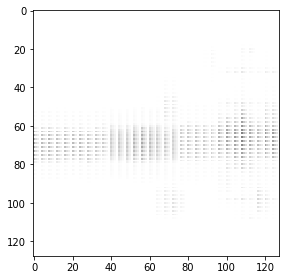

In [9]:
# Toon afbeelding
#-----------------------------------------------
#-----------------------------------------------
index = 6   
#-----------------------------------------------
#-----------------------------------------------

imshow(X_train[index])
#imshow(X_test[index].reshape((64,64)),cmap='gray')
# imshow(X_train[index])

In [11]:
# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 32 # 
epochs = 70 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 2
img_rows, img_cols = 128, 128
input_shape = (img_rows, img_cols,1)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(9, 9), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='relu')) # relu / softmax

#model.compile(loss="categorical_crossentropy",
#              optimizer='adam',
#              metrics=['accuracy'])



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      2624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 32)        0

In [ ]:
#model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])

In [13]:

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

/home/bit/.local/lib/python3.6/site-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/70
74/74 [==============================] - 52s 678ms/step - loss: 3.4756 - accuracy: 0.4430 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 2/70
74/74 [==============================] - 51s 683ms/step - loss: 2.3422 - accuracy: 0.4347 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 3/70
74/74 [==============================] - 47s 638ms/step - loss: 1.7175 - accuracy: 0.3854 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 4/70
74/74 [==============================] - 46s 627ms/step - loss: 0.8188 - accuracy: 0.3548 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 5/70
74/74 [==============================] - 51s 686ms/step - loss: 0.7342 - accuracy: 0.3465 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 6/70
74/74 [==============================] - 58s 781ms/step - loss: 0.7221 - accuracy: 0.3288 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 7/70
74/74 [==============================] - 82s 1s/step - loss: 0.6985 - accuracy: 0.3507 - val_loss: 0.6931 - val_accuracy: 0.3515
Ep

74/74 [==============================] - 229s 3s/step - loss: 0.6931 - accuracy: 0.3403 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 59/70
74/74 [==============================] - 218s 3s/step - loss: 0.6959 - accuracy: 0.3509 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 60/70
74/74 [==============================] - 218s 3s/step - loss: 0.7025 - accuracy: 0.3562 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 61/70
74/74 [==============================] - 219s 3s/step - loss: 0.6932 - accuracy: 0.3298 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 62/70
74/74 [==============================] - 185s 2s/step - loss: 0.6931 - accuracy: 0.3451 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 63/70
74/74 [==============================] - 196s 3s/step - loss: 0.6938 - accuracy: 0.3462 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 64/70
74/74 [==============================] - 197s 3s/step - loss: 0.6959 - accuracy: 0.3580 - val_loss: 0.6931 - val_accuracy: 0.3515
Epoch 65/70
74/74 

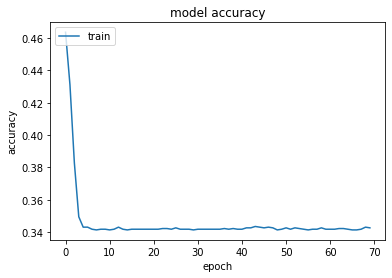

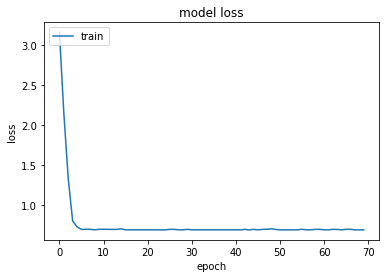

In [15]:
# Accuray 
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# Performantie op de test data

y_pred = model.predict_classes(X_test)
print('\n')
print('accuracy score:', accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)

/home/bit/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '




accuracy score: 35.153583617747444


              precision    recall  f1-score   support

           0       0.35      1.00      0.52       412
           1       0.00      0.00      0.00       760

    accuracy                           0.35      1172
   macro avg       0.18      0.50      0.26      1172
weighted avg       0.12      0.35      0.18      1172

[[412   0]
 [760   0]]


/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


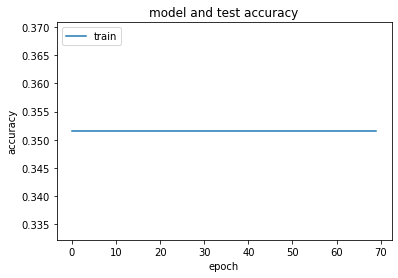

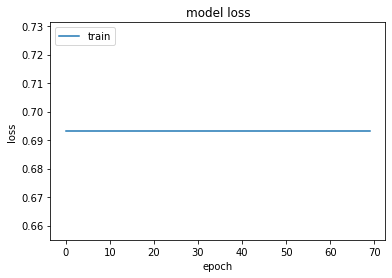

In [17]:
# Accuray 
plt.plot(history.history['val_accuracy'])

plt.title('model and test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()